In [32]:
from hossam import load_data
from pandas import melt, DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt 


from scipy.stats import t, normaltest,  levene, ttest_ind, bartlett, ttest_rel, mannwhitneyu
from statannotations.Annotator import Annotator

📘 연습문제

어떤 화학약품의 제조에 상표가 다른 두 종류의 원료가 사용되고 있다.
각 원료에서 주성분 A의 함량은 material 데이터셋에 정리되어 있다.
이 두 원료의 주성분 A의 함량이 다른지를 분석하라.

In [8]:
material = load_data('material')
material

[data] https://data.hossam.kr/data/lab10_/material.xlsx
[desc] 어떤 화학 약품에 사용되는 서로 다른 상표의 주성분 A 함량표 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0
5,80.4,82.3
6,81.6,81.0
7,79.9,80.2
8,84.4,82.2
9,80.9,82.3


In [9]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

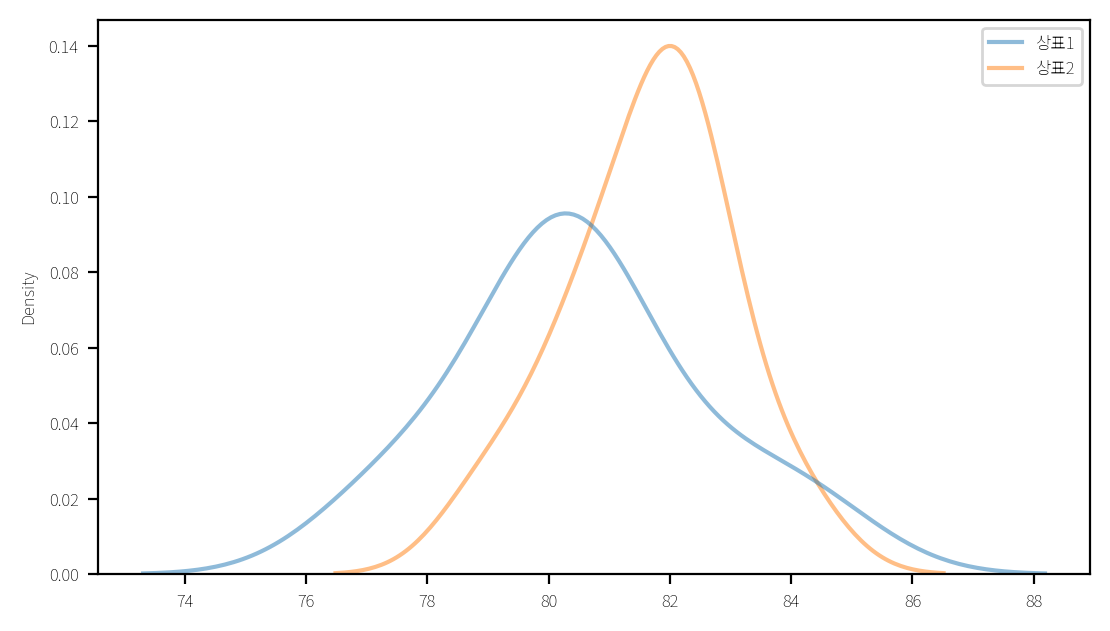

In [10]:
data = material[['상표1', '상표2']]
max = data.max()
clevel = 0.95
dof = len(data)-1
sp_mean = data.mean()
sp_std = data.std(ddof=1)
sp_std_error = sp_std/sqrt(len(data))

cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

width_px = 1280
height_px = 720
rows = 1
cols=1
figsize = (width_px /my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols,figsize=figsize, dpi=my_dpi)

# 그래프 그리기->seaborn 사용
sb.kdeplot(data=material, fill=False, alpha = 0.5)
           

ax.axvline(cmin, linestyle=':', color='#000000', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#000000',linewidth=0.5)


ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax],0,ymax,alpha=0.1, color='#000000')
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#000000')


ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()


In [ ]:
data = material[['상표1','상표2']]

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


[1]📝상표1과 상표2간의 함량 평균 차이가 있는지 검정

In [ ]:
s,p = ttest_ind(material['상표1'],material['상표2'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -1.528, p-value: 0.142, 귀무가설 채택'

평균에 차이가 있다

📝상표1의 평균이 상표2의 평균보다 더 큰지 검정<br>
H0:상표1의 평균이 상표2의 평균보다 작거나 같다<br>
H1:상표1의 평균이 상표2의 평균보다 크다<br>

alternative = 'greater'코드: 대립가설을 지정

In [ ]:
s, p = ttest_ind(material['상표1'], material['상표2'], alternative= 'greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p, "대립" if p<= 0.05 else "귀무") 

'statistic:-1.528, p-value:0.929, 귀무가설채택'

대립가설을 기각한다.즉 상표1과 상표2의 함량 평균의 차이는 작거나 같다.

📝상표1의 평균이 상표2의 평균보다 더 작은지 검정<br>
H0:더 작거나 같다<br>
H1:더 작다<br>

In [ ]:
s, p = ttest_ind(material['상표1'], material['상표2'], alternative = 'less')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p,"대립"if p<=0.05 else "귀무")

'statistic:-1.528, p-value:0.071, 귀무가설채택'

In [ ]:
즉 두 화학약품의 제조의 원료의 평균 함량에는 차이가 있는 것으로 나타났으며, 상표1과 상표2로 나누었을 때 상표1이 상표2보다 평균의 차이가 작거나 같은 것으로 나타났습니다.
또한, 상표1에는 이상치가 있는 것으로 나타났다. 


SyntaxError: invalid syntax (2798851693.py, line 1)

C:\Users\itwill\AppData\Local\Temp\ipykernel_17928\78511916.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["상표1"], df["상표2"]], labels=["상표1", "상표2"])


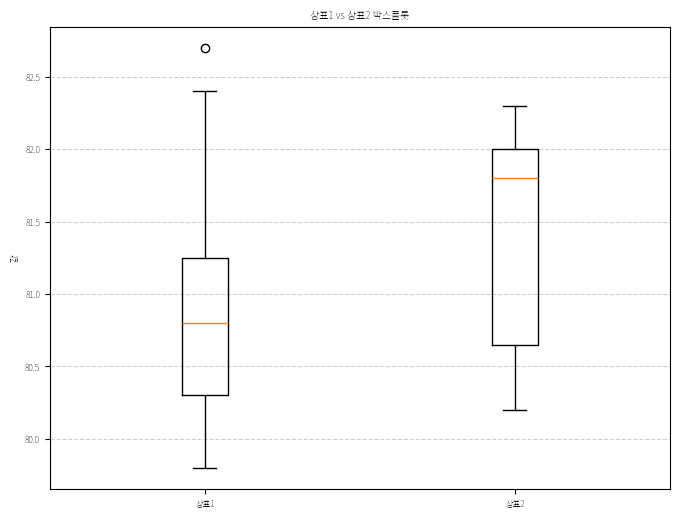

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 구성
data = {
    "상표1": [80.4, 82.7, 81.1, 79.8, 82.4, 80.4, 79.9, 81.0, 80.2, 80.8, 81.4],
    "상표2": [81.8, 81.8, 80.7, 80.6, 82.0, 82.3, 80.2, 82.0, 80.2, 82.3, 81.7]
}

df = pd.DataFrame(data)

# 박스플롯
plt.figure(figsize=(8, 6))
plt.boxplot([df["상표1"], df["상표2"]], labels=["상표1", "상표2"])
plt.title("상표1 vs 상표2 박스플롯")
plt.ylabel("값")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


📘연습문제 풀이

In [ ]:
my_dpi = 200
fpath = "./NotoSansKR-Regular.ttf"
fprop = fm.FontProperties(fname=fpath)
fname = fprop.get_name()


plt.rcParams['font.family'] = fname
plt.rcParams['font.size'] = 6
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
material = load_data('material')
print("\n====데이터 크기 확인=====")
print(f"데이터셋 크기:{material.shape}")
print(f"열 개수:{material.shape[1]}")
print(f"행 개수:{material.shape[0]}")

print("\n=====타입확인=====")
print(material.info())

material.head()

[data] https://data.hossam.kr/data/lab10_/material.xlsx
[desc] 어떤 화학 약품에 사용되는 서로 다른 상표의 주성분 A 함량표 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata

====데이터 크기 확인=====
데이터셋 크기:(11, 2)
열 개수:2
행 개수:11

=====타입확인=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표1     11 non-null     float64
 1   상표2     11 non-null     float64
dtypes: float64(2)
memory usage: 308.0 bytes
None


,상표1,상표2
0,80.4,81.8
1,78.2,82.7
2,80.1,80.7
3,77.1,84.0
4,79.6,79.0


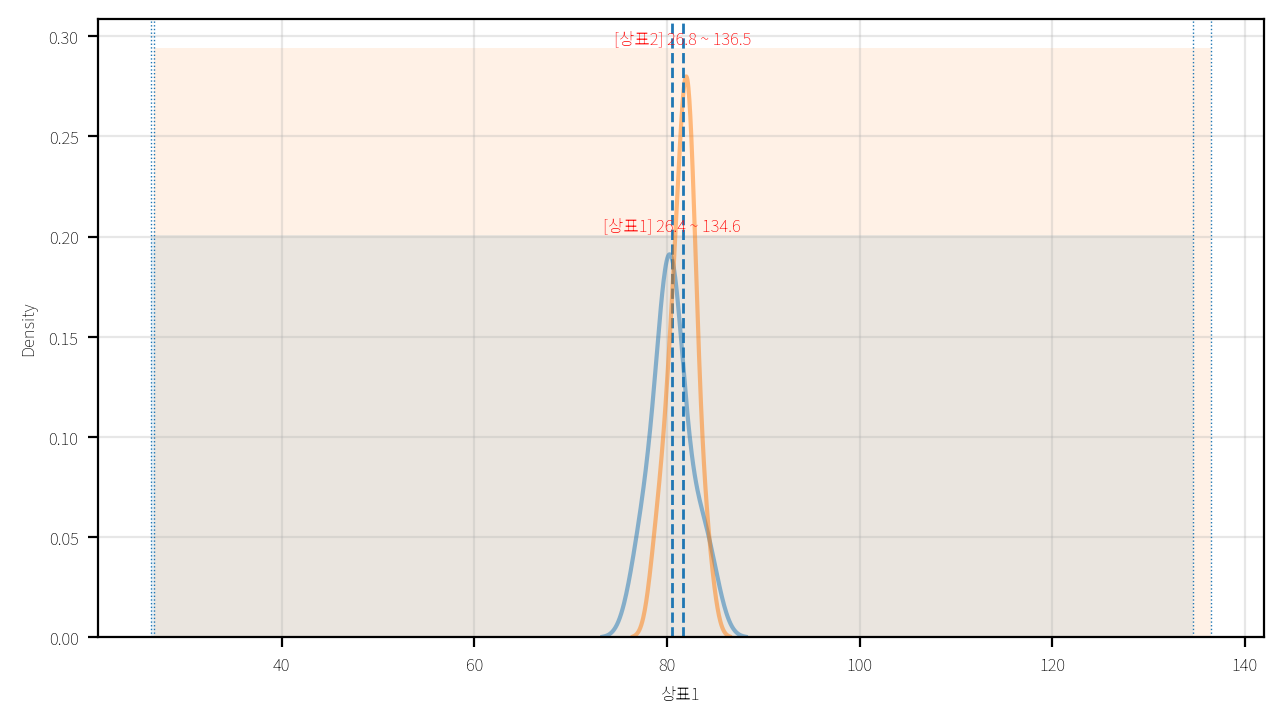

In [ ]:
data = material[['상표1', '상표2']]

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:

    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].mean()
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin , cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle = ':', linewidth = 0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax],0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2 + cmin,
            y = ymax,
            s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size":6, "color":"red"})
    
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
plt.close()

📘 #03. 가설검정의 가정 확인

In [ ]:
data = material[['상표1', '상표2']]
equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df


,statistic,p-value,result
field,,,
상표1,0.638272,0.726777,True
상표2,0.774961,0.678765,True
Bartlett,1.555316,0.212352,True


In [ ]:
fields = ['상표1', '상표2']

use_log = False

alternative = ["two-sided", "less", "greater"]
df = material[fields]

result = []

fmt = "μ({f0}) {0} μ({f1})"

equal_var = True

for a in alternative:
    if use_log:
        input1 = np.log(df[fields[0]])
        input2 = np.log(df[fields[1]])

    else:
        input1 = df[fields[0]]
        input2 = df[fields[1]]
    s,p = ttest_ind(input1,input2,alternative=a,
                    equal_var=equal_var)
    
    itp = None

    if a == "two-sided":
        itp = fmt.format("==" if p > 0.05 else "/=", f0 = fields[0],
                         f1=fields[1])
    elif a == "less":
        itp = fmt.format(">=" if p > 0.05 else "<", f0 = fields[0],
                         f1=fields[1])
        
    else:
        itp = fmt.format("<=" if p > 0.05 else ">", f0 = fields[0],
                         f1=fields[1])
        
    result.append({
        "alternative":a,
        "statistic":s,
        "p-value":p,
        "H0": p >0.05,
        "H1":p <=0.05,
        "interpretation": itp
    })

    if a == "two-sided" and p >0.05:
        break

rdf = DataFrame(result)
rdf.set_index("alternative", inplace = True)
rdf

,statistic,p-value,H0,H1,interpretation
alternative,,,,,
two-sided,-1.528327,0.142093,True,False,μ(상표1) == μ(상표2)


두 상표의 화학약품에 대한 주성분 A 함량을 비교하기 위해 독립표본 T검정을 수행한 결과
두 상품의 주성분 함량은 통계적으로 유의한 차이를 보이지 않는 것으로 확인되었다.(P >
0.05).

📘 #05. 가설 검정 결과 시각화

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


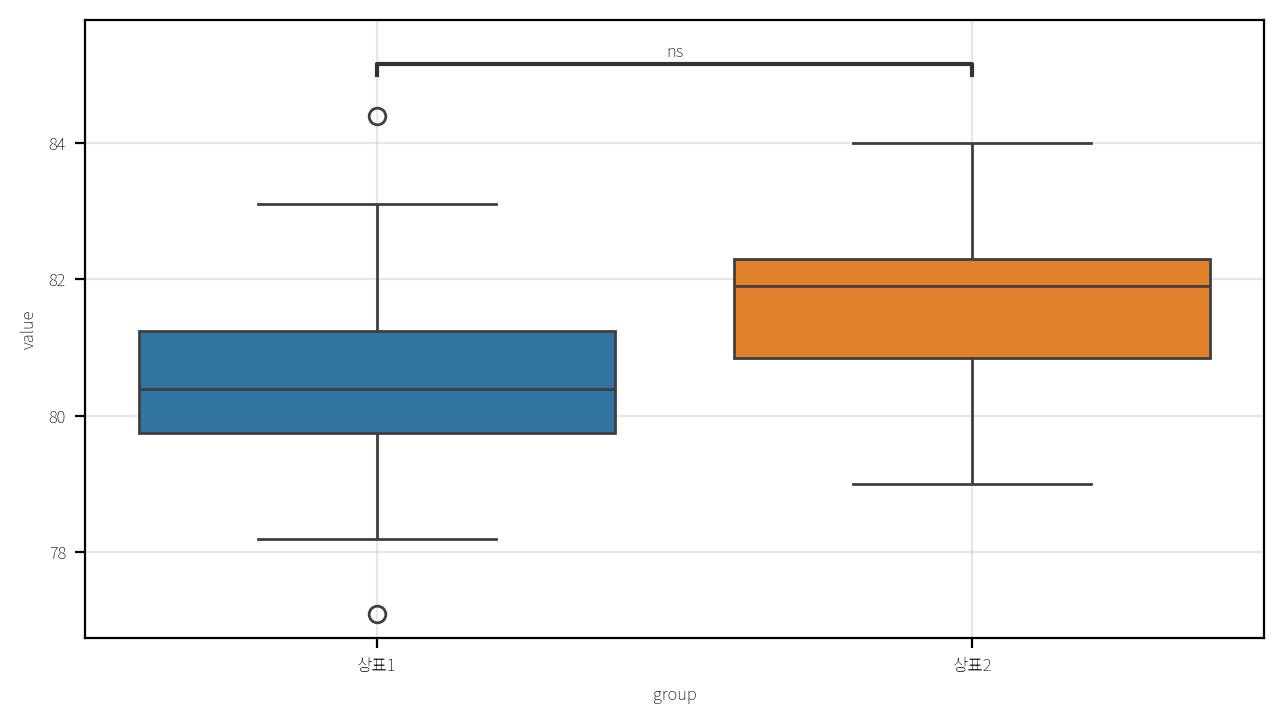

In [ ]:
# 검정할 데이터 필드명
fields = ['상표1', '상표2']
# 검정 방법
# `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`,
# `Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`,
# `Kruskal`
test_method = 't-test_ind'
# 데이터 재배치
df = melt(material[fields], value_vars=fields, var_name='group',
value_name='value')
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

📚 [LAB 10] 7. 대응 표본 T-검정 (Paired
T-test)

In [ ]:
my_dpi = 200 # 이미지 선명도(100~300)
fpath = "./NotoSansKR-Regular.ttf" # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(fpath) # 폰트의 글꼴을 시스템에 등록함
fprop = fm.FontProperties(fname=fpath) # 폰트의 속성을 읽어옴
fname = fprop.get_name() # 읽어온 속성에서 폰트 이름 추출
plt.rcParams['font.family'] = fname # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 6 # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False # 그래프에 마이너스 깨짐 방지

In [ ]:
origin = load_data("deer")
origin

[data] https://data.hossam.kr/data/lab10_/deer.xlsx
[desc] 사슴의 왼쪽 앞다리와 왼쪽 뒷다리의 길이를 측정한 자료 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,사슴,앞다리,뒷다리
0,1,138,142
1,2,136,140
2,3,147,144
3,4,139,144
4,5,143,142
5,6,141,146
6,7,143,149
7,8,145,150
8,9,136,142
9,10,146,148


In [ ]:
data = origin[['앞다리', '뒷다리']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
앞다리,1.824001,0.401720,True
뒷다리,1.376960,0.502339,True
Bartlett,0.340678,0.559438,True


📝 [4] 사슴의 앞다리와 뒷다리의 길이가 다른지 검정

In [ ]:
s, p = ttest_rel(origin['앞다리'], origin['뒷다리'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -3.414, p-value: 0.008, 대립가설 채택'

차이값에 대한 t 통계량의 값이 -3.414이고 이에 대응되는 유의확률이 0.008이므로 (p ≤
0.05) 귀무가설을 기각하고 대립가설을 채택한다.<br>
즉, 사슴의 앞다리와 뒷다리의 길이에는 차이가 있다고 결론 내릴 수 있다.

📝 [5] 앞다리가 뒷다리보다 더 긴지 검정

In [ ]:
s, p = ttest_rel(origin['앞다리'], origin['뒷다리'],
alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -3.414, p-value: 0.996, 귀무가설 채택'

차이값에 대한 t 통계량의 값이 -3.414이고 이에 대응되는 유의확률이 0.996이므로(p >
0.05) 귀무가설을 기각할 수 없다.
즉, 앞다리는 뒷다리보다 길지 않다고 결론 내릴 수 있다.

📝 [6] 앞다리가 뒷다리보다 더 짧은지 검정

In [ ]:
s, p = ttest_rel(origin['앞다리'], origin['뒷다리'], alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -3.414, p-value: 0.004, 대립가설 채택'

차이값에 대한 t 통계량의 값이 -3.414이고 이에 대응되는 유의확률이 0.004이므로 (p ≤
0.05) 귀무가설을 기각하고 대립가설을 채택한다.
즉, 사슴의 앞다리는 사슴의 뒷다리보다 짧다고 할 수 있다.

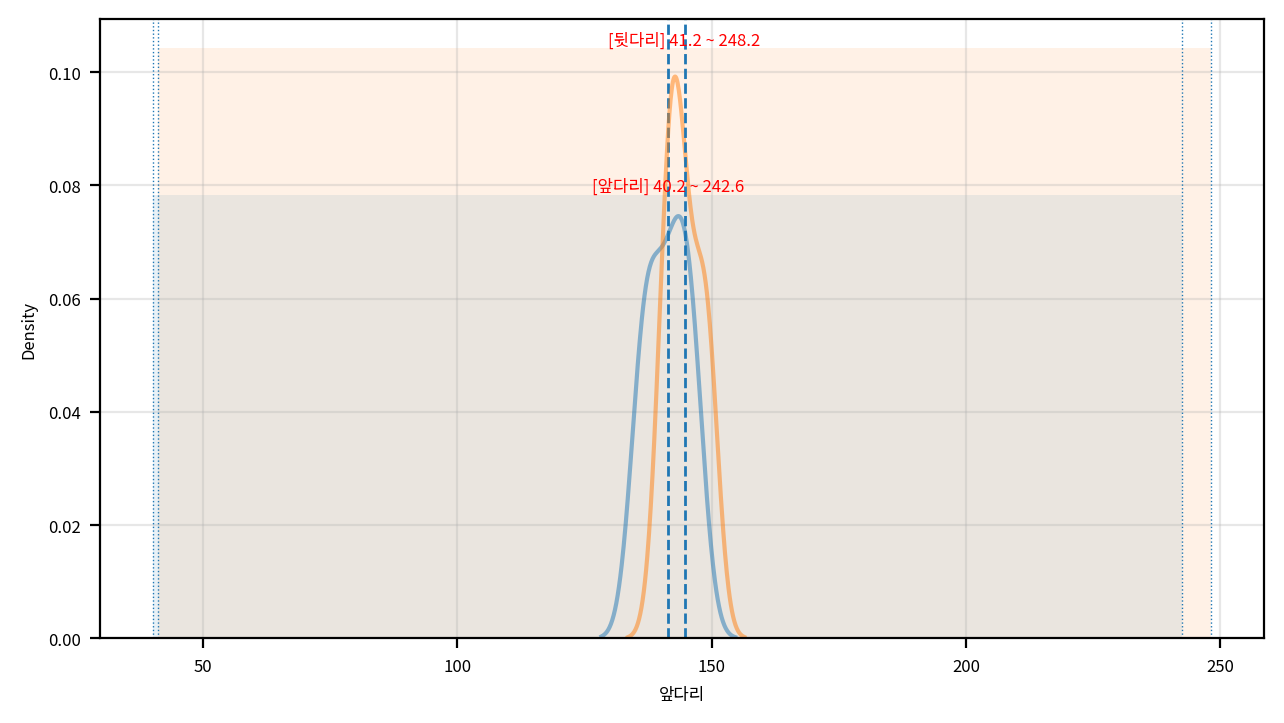

In [ ]:
data = origin[['앞다리', '뒷다리']] # 확인할 데이터

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:

    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].mean()
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin , cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle = ':', linewidth = 0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax],0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2 + cmin,
            y = ymax,
            s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size":6, "color":"red"})
    
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
plt.close()


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

상표1 vs. 상표2: t-test independent samples, P_val:1.421e-01 t=-1.528e+00


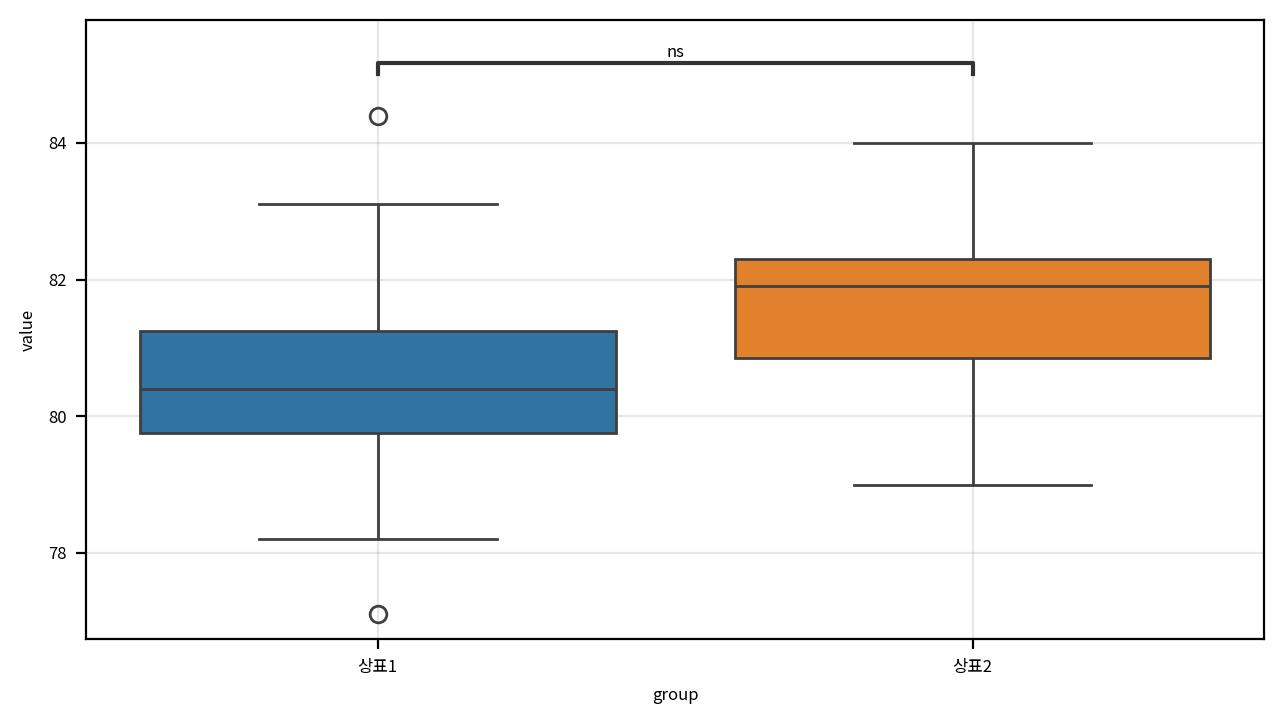

In [ ]:
data = origin[['앞다리', '뒷다리']] # 확인할 데이터

# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

📘 #03. 예제 (2) - 자동차 첨가제가 주행거리에 미치는 영향

In [ ]:
oil = load_data("oil")
oil

[data] https://data.hossam.kr/data/lab10_/oil.xlsx
[desc] 다섯 종류의 새 차에 대하여 같은 종류의 차 두 대 중에서 한 대를 랜덤하게 선택하여 첨가제를 사용하고, 다른 한 대에는 첨가제를 사용하지 않고 같은 운전자가 같은 장소에서 운전한 후 주행거리를 측정한 결과 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,그룹A,그룹B
0,13.2,11.8
1,13.1,13.9
2,16.3,12.1
3,14.9,10.5
4,14.2,9.3
5,16.1,16.3
6,15.1,15.1
7,13.6,12.3
8,15.8,11.6
9,14.2,8.4


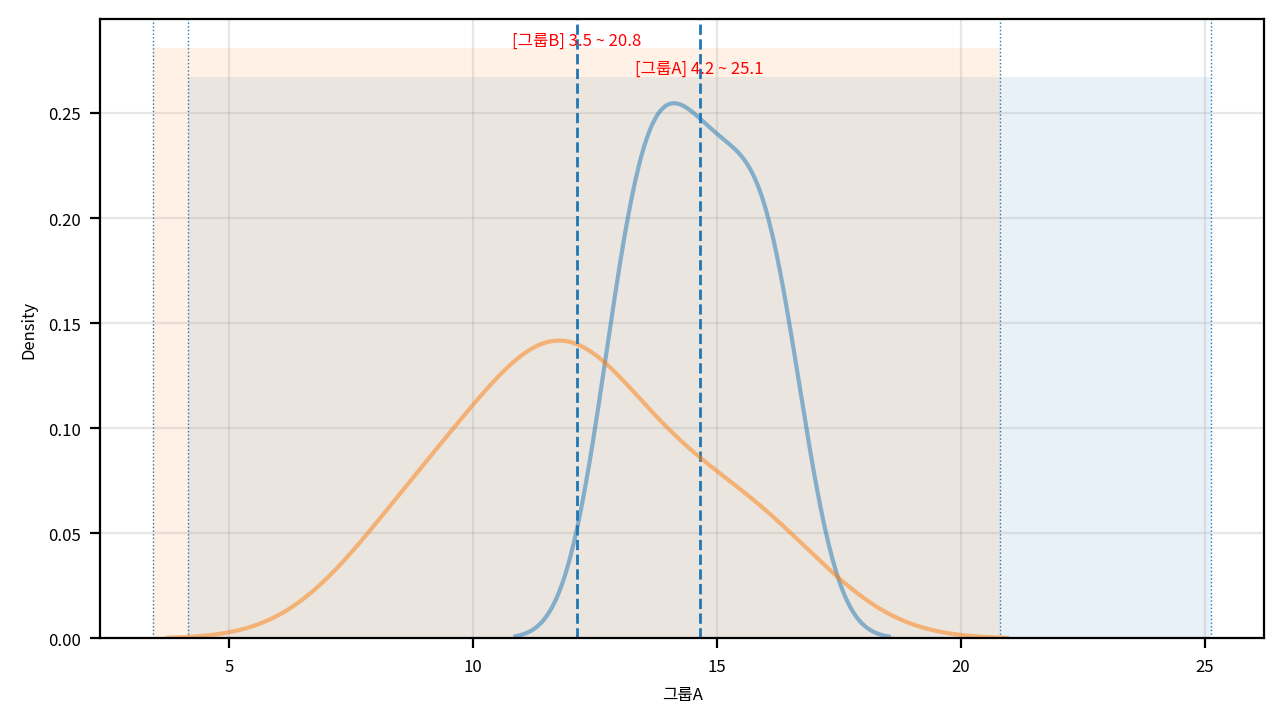

In [ ]:
data = oil[['그룹A', '그룹B']] # 확인할 데이터

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:

    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].mean()
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin , cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle = ':', linewidth = 0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax],0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2 + cmin,
            y = ymax,
            s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size":6, "color":"red"})
    
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
data = oil[['그룹A', '그룹B']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
그룹A,1.803522,0.405854,True
그룹B,0.151115,0.927227,True
Bartlett,4.272571,0.038732,False


📝 [4] 두 그룹의 주행거리가 차이가 있는지 검정

In [ ]:
s, p = mannwhitneyu(oil['그룹A'], oil['그룹B'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 81.000, p-value: 0.021, 대립가설 채택'

📝 [5] 그룹A의 주행거리가 그룹B의 주행거리보다 짧은지 검정

In [ ]:
s, p = mannwhitneyu(oil['그룹A'], oil['그룹B'],
alternative='less')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 81.000, p-value: 0.991, 귀무가설 채택'

📝 [6] 그룹A의 주행거리가 그룹B의 주행거리보다 긴지 검정

In [ ]:
s, p = mannwhitneyu(origin['그룹A'], origin['그룹B'],
alternative='greater')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 81.000, p-value: 0.010, 대립가설 채택'

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

그룹A vs. 그룹B: t-test independent samples, P_val:9.028e-03 t=2.926e+00


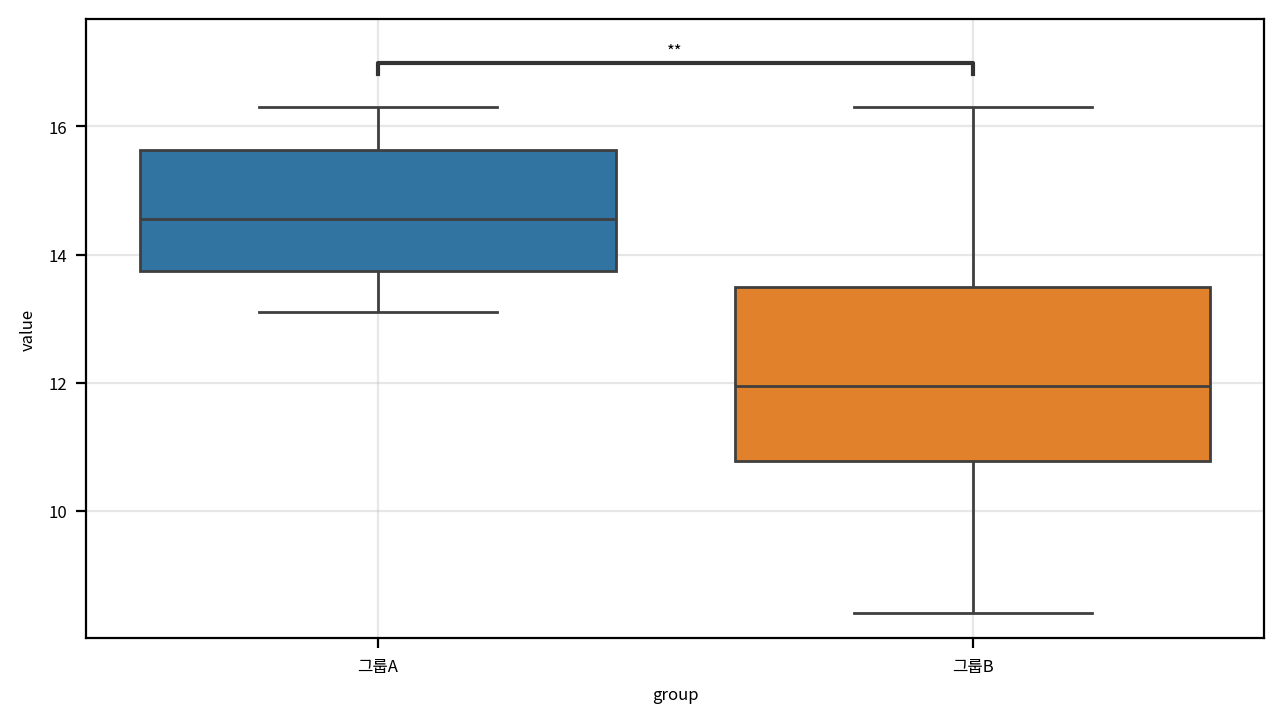

In [ ]:
# 검정할 데이터 필드명
fields = ['그룹A', '그룹B']
# 검정 방법
# `t-test_ind`, `t-test_paired`, `t-test_welch`, `Mann-Whitney`,
# `Mann-Whitney-gt`, `Mann-Whitney-ls`, `Levene`, `Wilcoxon`,
# `Kruskal`
test_method = 't-test_ind'
# 데이터 재배치
df = melt(oil[fields], value_vars=fields, var_name='group',
value_name='value')
# 1) 그래프 초기화
width_px = 1280 # 그래프 가로 크기
height_px = 720 # 그래프 세로 크기
rows = 1 # 그래프 행 수
cols = 1 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)
# 2) BoxPlot 그리기
sb.boxplot(data=df, x='group', y='value', hue='group')

annotator = Annotator(ax, data=df, x='group', y='value',
pairs=[fields])
annotator.configure(test=test_method)
annotator.apply_and_annotate()
# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3) # 배경 격자 표시
# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

📘 연습문제

📝 문제 1<br>
blood_pressure 데이터셋은 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임
약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터이다.
이 데이터를 통해 피임약 복용이 혈압에 영향을 주는지 분석하라.

In [ ]:
bp = load_data('blood_pressure')
bp

[data] https://data.hossam.kr/data/lab10_/blood_pressure.xlsx
[desc] 부인 15명을 대상으로 평상시 혈압을 측정한 뒤, 이들에게 이 피임약을 일정 기간 복용하게 한 후 이들의 혈압을 다시 측정한 결과를 기록한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,복용전,복용후
0,70,68
1,80,72
2,72,62
3,76,70
4,76,58
5,76,66
6,72,68
7,78,52
8,82,64
9,64,72


In [ ]:
# 가설검정
data = bp[['복용전', '복용후']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
복용전,2.590682,0.273805,True
복용후,2.656338,0.264962,True
Bartlett,1.013185,0.314141,True


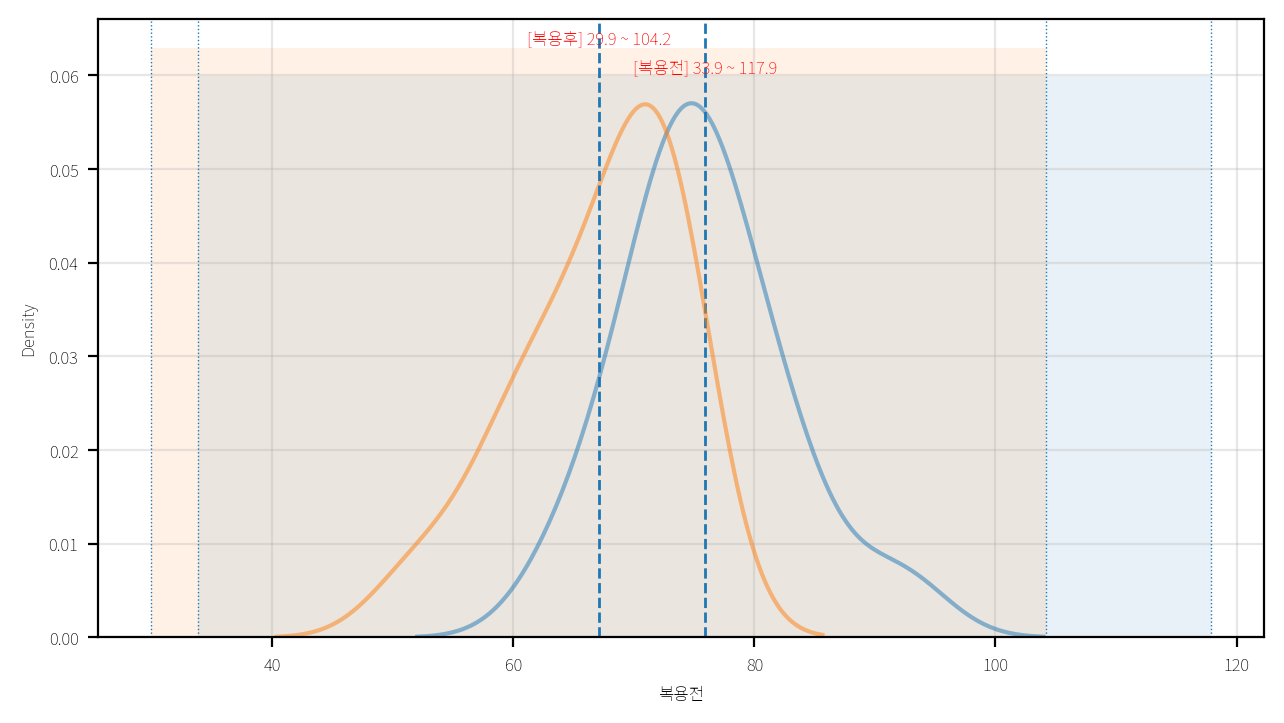

In [ ]:
data = bp[['복용전', '복용후']] # 확인할 데이터

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:

    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].mean()
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin , cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle = ':', linewidth = 0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax],0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2 + cmin,
            y = ymax,
            s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size":6, "color":"red"})
    
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
plt.close()

📝복용전과 복용후는 차이가 있다vs없다

In [ ]:
s, p = mannwhitneyu(bp['복용전'], bp['복용후'], alternative='two-sided')
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 188.000, p-value: 0.002, 대립가설 채택'

차이값에 대한 t통계량의 값이 188이고 이에 대응되는 유의확률이 0.002이므로 (p<0.05)<br>
귀무가설을 기각할 수 없다.<br>
복용후와 복용전은 차이가 없다는 것을 알 수 있으며, <br>
따라서 피임약 복용은 혈압에 영향을 미치지 않는다.

📝 문제 2

In [12]:
c_c = load_data('cookie_cats')
c_c

[data] https://data.hossam.kr/data/lab10_/cookie_cats.xlsx
[desc] 어느 모바일 게임의 버전에 따른 유저별 총 플레이 시간을 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


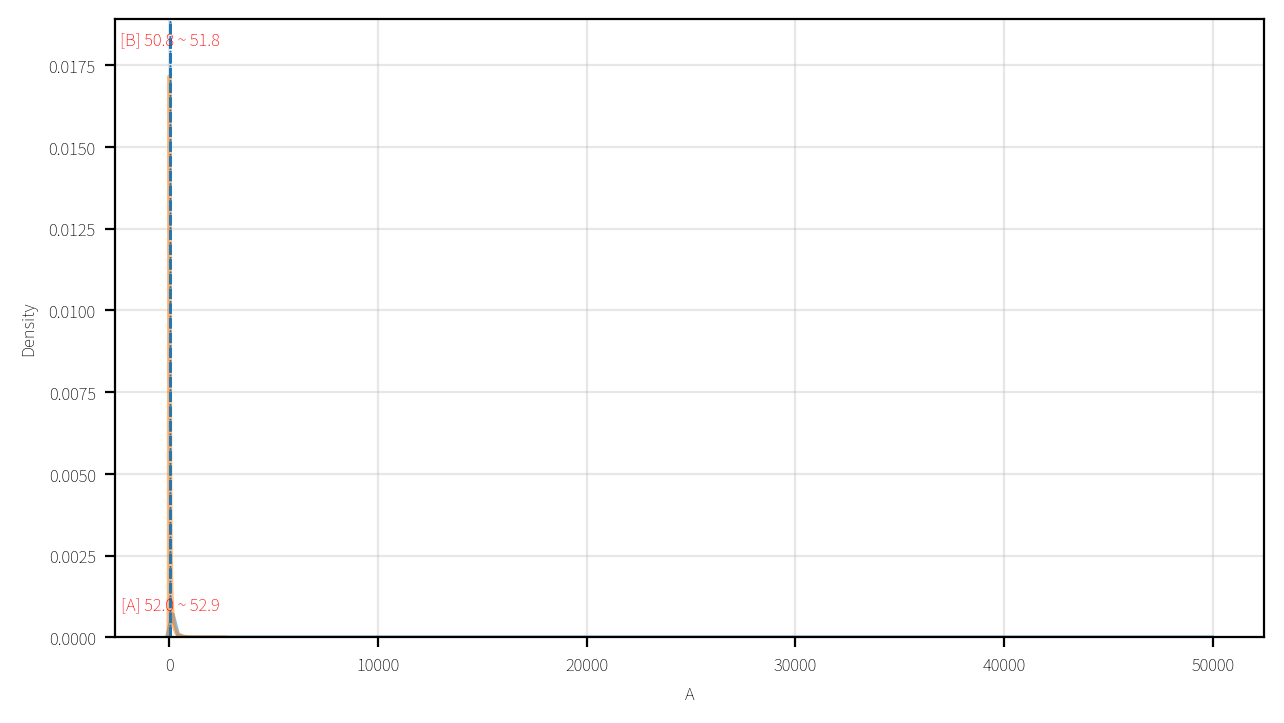

In [16]:
data = df[['A', 'B']] # 확인할 데이터

width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/my_dpi, height_px/my_dpi)
fig, ax = plt.subplots(rows,cols, figsize = figsize, dpi = my_dpi)

for c in data.columns:

    sb.kdeplot(data=data, x=c, fill=False, alpha=0.5)

    max = data[c].max()
    clevel = 0.95
    dof = len(data[c]) - 1
    sp_mean = data[c].mean()
    sp_std = data[c].mean()
    sp_std_error = sp_std / sqrt(len(data[c]))
    cmin , cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

    ax.axvline(cmin, linestyle=':', linewidth=0.5)
    ax.axvline(cmax, linestyle = ':', linewidth = 0.5)

    ymin, ymax = ax.get_ylim()
    ax.fill_between([cmin, cmax],0, ymax, alpha=0.1)
    ax.axvline(sp_mean, linestyle='--', linewidth=1)

    ax.text(x=(cmax-cmin)/2 + cmin,
            y = ymax,
            s = "[%s] %0.1f ~ %0.1f" % (c, cmin, cmax),
            horizontalalignment = "center",
            verticalalignment = "bottom",
            fontdict = {"size":6, "color":"red"})
    
ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()
plt.close()

📝헤비유저 제외 -> 일반 유저 데이터 생성

In [19]:
cutoff = c_c['sum_gamerounds'].quantile(0.99)
normal_users = c_c[c_c['sum_gamerounds'] <= cutoff]
normal_users

,userid,version,sum_gamerounds
0,116,A,3
1,337,A,38
2,377,B,165
3,483,B,1
4,488,B,179
...,...,...,...
90184,9999441,B,97
90185,9999479,B,30
90186,9999710,A,28
90187,9999768,B,51


A/B집단 분리

In [33]:
A = normal_users[normal_users['version'] == 'A']['sum_gamerounds']
B = normal_users[normal_users['version'] == 'B']['sum_gamerounds']
df = pd.DataFrame({
    'A': A,
    'B': B
})

df.head()

,A,B
0,3.0,NaN
1,38.0,NaN
2,NaN,165.0
3,NaN,1.0
4,NaN,179.0


C:\Users\itwill\AppData\Local\Temp\ipykernel_19292\3693026594.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A, B], labels=['개편전(A)', '개편후(B)'])


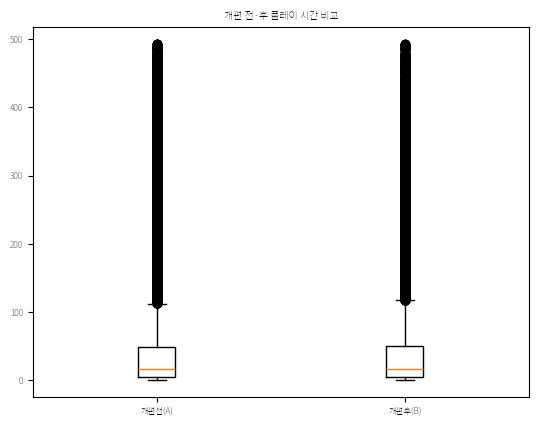

In [24]:
plt.boxplot([A, B], labels=['개편전(A)', '개편후(B)'])
plt.title('개편 전·후 플레이 시간 비교')
plt.show()


🍭일반유저들을 대상으로 했을 때 개편 전 평균 시간과 개편 후 평균 시간의 차이<br>

H0:차이가 없다<br>
H1:차이가 있다<br>

In [35]:
s,p = ttest_ind(A,B)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.554, p-value: 0.580, 귀무가설 채택'

차이값에 대한 t통계량의 값이 0.554이고, 이에 대응되는 유의확률이 0.580이므로 (p>0.05) 귀무가설을 기각할 수 없습니다. 즉, 개편 전 평균 시간과 개편 후의 평균시간의 차이는
거의 없는 것으로 나타났습니다

📝문제3

In [36]:
rd = load_data('runner_diet')
rd

[data] https://data.hossam.kr/data/lab10_/runner_diet.xlsx
[desc] 고등학교 육상선수 10명에게 감량훈련(2~4kg 정도)을 시킨 후 100m 달리기를 실시한 결과를 조사한 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,감량전,감량후
0,14.5,14.3
1,13.4,13.4
2,13.0,13.1
3,14.5,13.9
4,13.3,13.1
5,14.2,13.9
6,13.6,13.6
7,13.9,14.0
8,13.2,12.8
9,13.0,12.8


In [38]:
# 가설검정
data = rd[['감량전', '감량후']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
감량전,2.063078,0.356458,True
감량후,1.646609,0.438979,True
Bartlett,0.073124,0.786842,True


🍭체중감량전과 체중감량후의 차이가 있을까 없을까

In [41]:
s,p = ttest_ind(rd['감량전'], rd['감량후'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: 0.683, p-value: 0.503, 귀무가설 채택'

🍭체중감량전의 평균이 체중감량후의 평균보다 클까<br>
H0:크지않거나 같다<br>
H1:크다

In [42]:
s, p = ttest_ind(rd['감량전'], rd['감량후'], alternative= 'greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p, "대립" if p<= 0.05 else "귀무")

'statistic:0.683, p-value:0.252, 귀무가설채택'

차이값에 대한 t 통계량의 값이 0.683이고 이에 대응되는 유의확률이 0.503이므로 (p>0.05) 체중 감량전과 체중 감량후의 차이는 없는 것으로 나타났습니다.<br>
또한, 체중 감량전의 평균이 체중 감량후의 평균보다 클까라는 가설에서 통계량이 0.683, p-value값이 0.252인 결과, 체중 감량전의 평균과 체중감량후의 평균은 크지 않거나 같다는 결론이 나왔습니다.


📝 문제 4

In [44]:
wd = load_data('wrestler_diet')
wd

[data] https://data.hossam.kr/data/lab10_/wrestler_diet.xlsx
[desc] 고등학교 레슬링 선수에게 체중감량을 시키면 체력에 어떤 변화가 일어나는지 조사하기 위하여, 어느 고등학교의 레슬링 선수 12명을 표본추출하여 감량시킨 후 얻은 데이터 (출처: 방송통신대학교 통계학개론)
[!] Cannot read metadata


,이름,감량전 악력,감량후 악력,감량전 윗몸일으키기,감량후 윗몸일으키기,감량전 턱걸이,감량후 턱걸이
0,B.S,43,41,35,41,25,29
1,P.J,42,41,40,44,25,29
2,G.G,52,50,36,41,22,23
3,A.L,53,52,38,42,10,15
4,I.H,44,40,36,42,15,19
5,B.Y,46,47,39,44,17,19
6,I.K,48,47,35,42,24,26
7,K.B,58,55,34,36,17,18
8,K.J,50,50,33,35,17,20
9,S.S,48,50,39,45,21,25


🍭악력

In [76]:
before = wd['감량전 악력']
after = wd['감량후 악력']

gamlyang = pd.DataFrame({
    '감량전_악력': before,
    '감량후_악력': after

})
gamlyang.head()

,감량전_악력,감량후_악력
0,43,41
1,42,41
2,52,50
3,53,52
4,44,40


In [74]:
# 가설검정
data = gamlyang[['감량전_악력', '감량후_악력']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
감량전_악력,1.146496,0.563692,True
감량후_악력,1.358430,0.507015,True
Bartlett,1.049480,0.305627,True


‼️감량 전 악력과 감량 후의 악력 평균 비교

In [88]:
t, p = ttest_rel(before, after)

print(f"statistic: {t:.3f}, p-value: {p:.3f}, {'대립' if p < 0.05 else '귀무'}")

statistic: 2.365, p-value: 0.037, 대립


In [91]:
before = wd['감량전 악력']
after  = wd['감량후 악력']

t, p = ttest_rel(before, after)

print(f"t statistic = {t:.4f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("결론: 감량 전·후 악력은 유의하게 다르다. (대립가설 채택)")
else:
    print("결론: 감량 전·후 악력은 유의하게 다르지 않다. (귀무가설 채택)")


t statistic = 2.3654
p-value = 0.0375
결론: 감량 전·후 악력은 유의하게 다르다. (대립가설 채택)


In [63]:
before = wd['감량전 윗몸일으키기']
after = wd['감량후 윗몸일으키기']

witmom = pd.DataFrame({
    '감량전_윗몸일으키기': before,
    '감량후_윗몸일으키기': after
})
witmom.head()

,감량전_윗몸일으키기,감량후_윗몸일으키기
0,35,41
1,40,44
2,36,41
3,38,42
4,36,42


In [90]:
# 가설검정
data = witmom[['감량전_윗몸일으키기', '감량후_윗몸일으키기']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
감량전_윗몸일으키기,1.362864,0.505892,True
감량후_윗몸일으키기,2.007707,0.366465,True
Bartlett,2.214826,0.136690,True


In [ ]:
before = wd['감량전 윗몸일으키기']
after  = wd['감량후 윗몸일으키기']

t, p = ttest_rel(before, after)

print(f"t statistic = {t:.4f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("결론: 감량 전·후 윗몸일으키기는 유의하게 다르다. (대립가설 채택)")
else:
    print("결론: 감량 전·후 윗몸일으키기는 유의하게 다르지 않다. (귀무가설 채택)")

t statistic = -7.1799
p-value = 0.0000
결론: 감량 전·후 윗몸일으키기는 유의하게 다르다. (대립가설 채택)


In [70]:
before = wd['감량전 턱걸이']
after = wd['감량후 턱걸이']

tuck = pd.DataFrame({
    '감량전_턱걸이': before,
    '감량후_턱걸이': after
})
tuck.head()

,감량전_턱걸이,감량후_턱걸이
0,25,29
1,25,29
2,22,23
3,10,15
4,15,19


In [94]:
# 가설검정
data = tuck[['감량전_턱걸이', '감량후_턱걸이']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
감량전_턱걸이,0.154328,0.925738,True
감량후_턱걸이,1.021094,0.600167,True
Bartlett,0.883029,0.347373,True


In [96]:
before = wd['감량전 턱걸이']
after  = wd['감량후 턱걸이']

t, p = ttest_rel(before, after)

print(f"t statistic = {t:.4f}")
print(f"p-value = {p:.4f}")

if p < 0.05:
    print("결론: 감량 전·후 턱걸이는 유의하게 다르다. (대립가설 채택)")
else:
    print("결론: 감량 전·후 턱걸이는 유의하게 다르지 않다. (귀무가설 채택)")

t statistic = -6.8420
p-value = 0.0000
결론: 감량 전·후 턱걸이는 유의하게 다르다. (대립가설 채택)


악력, 윗몸일으키기, 턱걸이 이렇게 세 종목 모두 대응표본검정을 실행한 결과,<br>
세 종목 모두 체력변화가 다르다는 결과가 나왔습니다.<br>
따라서, 세 종목을 통해 체중감량을 시켰을 때 체력변화는 유의미한 차이가 있다고 볼 수 있습니다.

📝 문제 5

In [97]:
commercial = load_data('commercial')
commercial

[data] https://data.hossam.kr/data/lab10_/commercial.xlsx
[desc] 서울시의 2023년 상권에 따른 분기별 매출액과 매출건수에 대한 자료 (출처: 서울 열린데이터 광장)
[!] Cannot read metadata


,quarter,code,type,name,sales_amount,number_of_sales
0,1,3001491,관광특구,이태원 관광특구,72523644100,2496865
1,1,3001492,관광특구,명동 남대문 북창동 다동 무교동 관광특구,283332346393,10246122
2,1,3001493,관광특구,동대문패션타운 관광특구,81696730221,2880324
3,1,3001494,관광특구,종로·청계 관광특구,212062656625,4960006
4,1,3001495,관광특구,잠실 관광특구,231338386876,5995166
...,...,...,...,...,...,...
6217,4,3130323,전통시장,둔촌역전통시장,13523478306,535132
6218,4,3130324,전통시장,길동복조리시장,6236556030,330148
6219,4,3130325,전통시장,명일전통시장,3973269286,186049
6220,4,3130326,전통시장,고덕 골목형상점가,15013907999,755565


‼️상반기(1,2)분기 데이터프레임 생성

In [100]:
# 골목상권만 필터링
golmok =  commercial[commercial['name'].str.contains('골목상권')]
golmok

,quarter,code,type,name,sales_amount,number_of_sales
1494,1,3130260,전통시장,신대방1동골목상권,2296753976,89755
3049,2,3130260,전통시장,신대방1동골목상권,2872389264,134113
4606,3,3130260,전통시장,신대방1동골목상권,3251119337,153923
6160,4,3130260,전통시장,신대방1동골목상권,3242494262,146218


In [102]:
# 상반기(1,2분기)와 하반기(3,4분기) 나누기
first_half = golmok[golmok['quarter'].isin([1,2])]
second_half = golmok[golmok['quarter'].isin([3,4])]

print(first_half)
print(second_half)

      quarter     code  type       name  sales_amount  number_of_sales
1494        1  3130260  전통시장  신대방1동골목상권    2296753976            89755
3049        2  3130260  전통시장  신대방1동골목상권    2872389264           134113
      quarter     code  type       name  sales_amount  number_of_sales
4606        3  3130260  전통시장  신대방1동골목상권    3251119337           153923
6160        4  3130260  전통시장  신대방1동골목상권    3242494262           146218


In [104]:
# 매출액만 추출해서 두 칼럼을 가진 DATAFrame 만들기
fh_sales = first_half['sales_amount'].reset_index(drop=True)
sh_sales = second_half['sales_amount'].reset_index(drop=True)

In [109]:
# 상반기/하반기만 존재하는 새 DataFrame 만들기
df = pd.DataFrame({
    '상반기_매출액':fh_sales,
    '하반기_매출액':sh_sales
})

df

,상반기_매출액,하반기_매출액
0,2296753976,3251119337
1,2872389264,3242494262


상반기 매출액과 하반기 매출액 평균차이가 있나

In [111]:
t, p = ttest_ind(fh_sales, sh_sales, alternative='two-sided')

print(f"t = {t:.3f}, p-value = {p:.3f}")

if p < 0.05:
    print("결론: 상반기와 하반기 매출액은 유의한 차이가 있다.")
else:
    print("결론: 상반기와 하반기 매출액은 유의한 차이가 없다.")

t = -2.301, p-value = 0.148
결론: 상반기와 하반기 매출액은 유의한 차이가 없다.


통계량이 -2.301, p-value값이 0.148 (p-value >= 0.05)이므로,<br>
귀무가설을 기각하지 않는다.
따라서, 상반기 매출액과 하반기 매출액에는 유의한 차이가 없는 것으로 나타낼 수 있다. 

📝추가문제

In [113]:
ah = load_data('adult_height')
ah

[data] https://data.hossam.kr/data/lab10_/adult_height.xlsx
[desc] 성인 30명의 성별(sex), 신장(height) 데이터 (출처: 방송통신대학교 바이오통계학)
[!] Cannot read metadata


,sex,height
0,F,161
1,F,160
2,F,164
3,F,172
4,F,157
5,F,164
6,F,166
7,F,169
8,F,166
9,F,164


(1)귀무가설과 대립가설은 각각 무엇인가?<br>
H0:남성과 여성의 평균 키를 비교했을 때, 유의미한 차이가 있다.<br>
H1:남성과 여성의 평균키의 차이는 거의 없다.

(2)(1)번의 가설을 검정하고 결과를 해석하시오.

In [125]:
# Female과 Male의 몸무게를 데이터프레임으로 나눔
Female = ah[ah['sex'] == 'F']['height'].reset_index(drop=True)
Male = ah[ah['sex']=='M']['height'].reset_index(drop=True)

dataframe = pd.DataFrame({
    "남자": Female,
    "여자": Male
})

dataframe.head()


,남자,여자
0,161,166
1,160,157
2,164,171
3,172,174
4,157,170


In [128]:
# 가설검정
data = dataframe[['남자', '여자']] # 확인할 데이터

equal_var_fields = []
normal_dist = True
report = []

for c in data.columns:
    s, p = normaltest(data[c])

    normalize = p > 0.05
    report.append({
        "field":c ,
        "statistic":s,
        "p-value":p,
        "result":normalize

    }) 
    normal_dist = normal_dist and normalize

if len(data.columns) > 1:
    if normal_dist:
        n = "Bartlett"
        s, p = bartlett(*data.values.T)

    else:
        n = "Levene"
        s, p = levene(*data.values.T,  center = 'median')

    report.append({
        "field":n,
        "statistic":s,
        "p-value":p,
        "result":p > 0.05
    })

report_df = DataFrame(report).set_index('field')
report_df

,statistic,p-value,result
field,,,
남자,0.478834,0.787086,True
여자,3.245853,0.197320,True
Bartlett,2.055126,0.151695,True


‼️남녀의 평균 키는 같을까

In [131]:
s,p = ttest_ind(dataframe['남자'], dataframe['여자'])
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -3.976, p-value: 0.000, 대립가설 채택'

‼️독립표본검정 (ttest_ind) 사용.<br>
   두 개의 독립적인 값을 비교하므로, 독립표본 검정 사용.<br>

   가설:남자의 평균키는 여자의 평큔키 보다 크다.

H0:남자의 평균키는 여자의 평균키 보다 작다.<br>
H1:남자의 평균키는 여자의 평균키보다 크다.


In [135]:
s, p = ttest_ind(dataframe['남자'], dataframe['여자'], alternative = 'greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설채택".format(s,p,"대립"if p<=0.05 else "귀무")

'statistic:-3.976, p-value:1.000, 귀무가설채택'